<a href="https://colab.research.google.com/github/terranexum/EMiTS/blob/main/EMiTS_Example_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying EMiTS for Renewable Energy Expansion

An example of how the EMiTS metric can be used, as outlined in the open source project at https://github.com/terranexum/EMiTS. Contributions are welcome.

This example is being developed to showcase how rapid community-level renewable energy deployment could occur through the use of EMiTS. The actual peer-to-peer transactions could be supported through the use of the Plurigrid Protocol. Plurigrid's work on this protocol is under their GitHub repository here: https://github.com/plurigrid. 

In [ ]:
import math
from enum import Enum

## Defining Elements and Collections of Elements Using EMiTS

Elements are any products or services that can be transacted. They are named so 
because they are the basic elements of exchange in any economic transaction.

In [ ]:
# Economic Type
class EType(Enum):

  PRODUCT = 1
  SERVICE = 2

# Transaction Type
class TType(Enum):

  SELL = 1
  BUY = 2

class Element: 

  def __init__(self, ename, etype):
    self.E = 1
    self.M = 1
    self.I = 1
    self.T = 1
    self.S = 1
    self.ename = ename
    self.etype = etype
    self.ttype = TType.SELL
    self.value = 1

  def setValue(self, E=1, M=1, I=1, T=1, S=1):
    self.E = E
    self.M = M
    self.I = I
    self.T = T
    self.S = S
    self.value = (M * S) / (E * T)

  def setTType(self, ttype):
    self.ttype = ttype

  def getValue(self):
    return self.value

class ElementArray:

  def __init__(self, name, object_type):
    self.name = name
    self.object_type = object_type
    self.elements = []
    self.ttype = TType.SELL
    self.value = 0

  def setSize(self, size):
    self.size = size
    for i in self.size:
      self.elements.append(self.object_type)
    self.value = self.setValue()

  def setValue(self):
    array_value = 0
    for element in self.elements:
      array_value += element.getValue()
    self.value = array_value

  def setTType(self, ttype):
    self.ttype = ttype

  def getValue(self):
    return self.value


## Defining Units to be Bought or Sold

We will now define the units seen in the following schematic, which depicts an arrangement of three units during the day and the same 3 units during the night. The EMiTS values are shown in yellow for all units, and the resulting values of the elements being offered are given in green. The blue label identifies the electricity generator, or e-gen, which is a different entity during the day than during the night because by day, solar arrays provide power. During the night, those with energy storage provide power. 

The default value is 1 for any EMiTS variable if it is not necessary to define the element. In all cases below, information is 1 and thus it is not shown as a yellow circle. However, for the daytime e-gen, we also see that S is 1 km. That is because there is no distance that the e-gen needs to move anything across to offer the solar energy for sale. 

For simplicity, the daytime and nighttime energy requirements are considered to be equal. 

### How to Read the Diagram

* Daytime: There is only one seller so anyone wanting electricity will have to purchase it at that price. If there were more than one seller, the seller with the lowest price would be the preferred seller for the two buyers. Only the buyer with the storage battery can make a purchase of the full amount of electricity being offered by the seller. The buyer with the home can only make a partial purchase of electricity at the moment.
* Nighttime: the buyer with the storage battery during the day has now become the seller and the seller with the rooftop solar array at home is now needing to be a buyer. Neither of the two buyers can afford to purchase all the electricity being sold. Thus, the seller must sell portions of that electricity to multiple buyers.

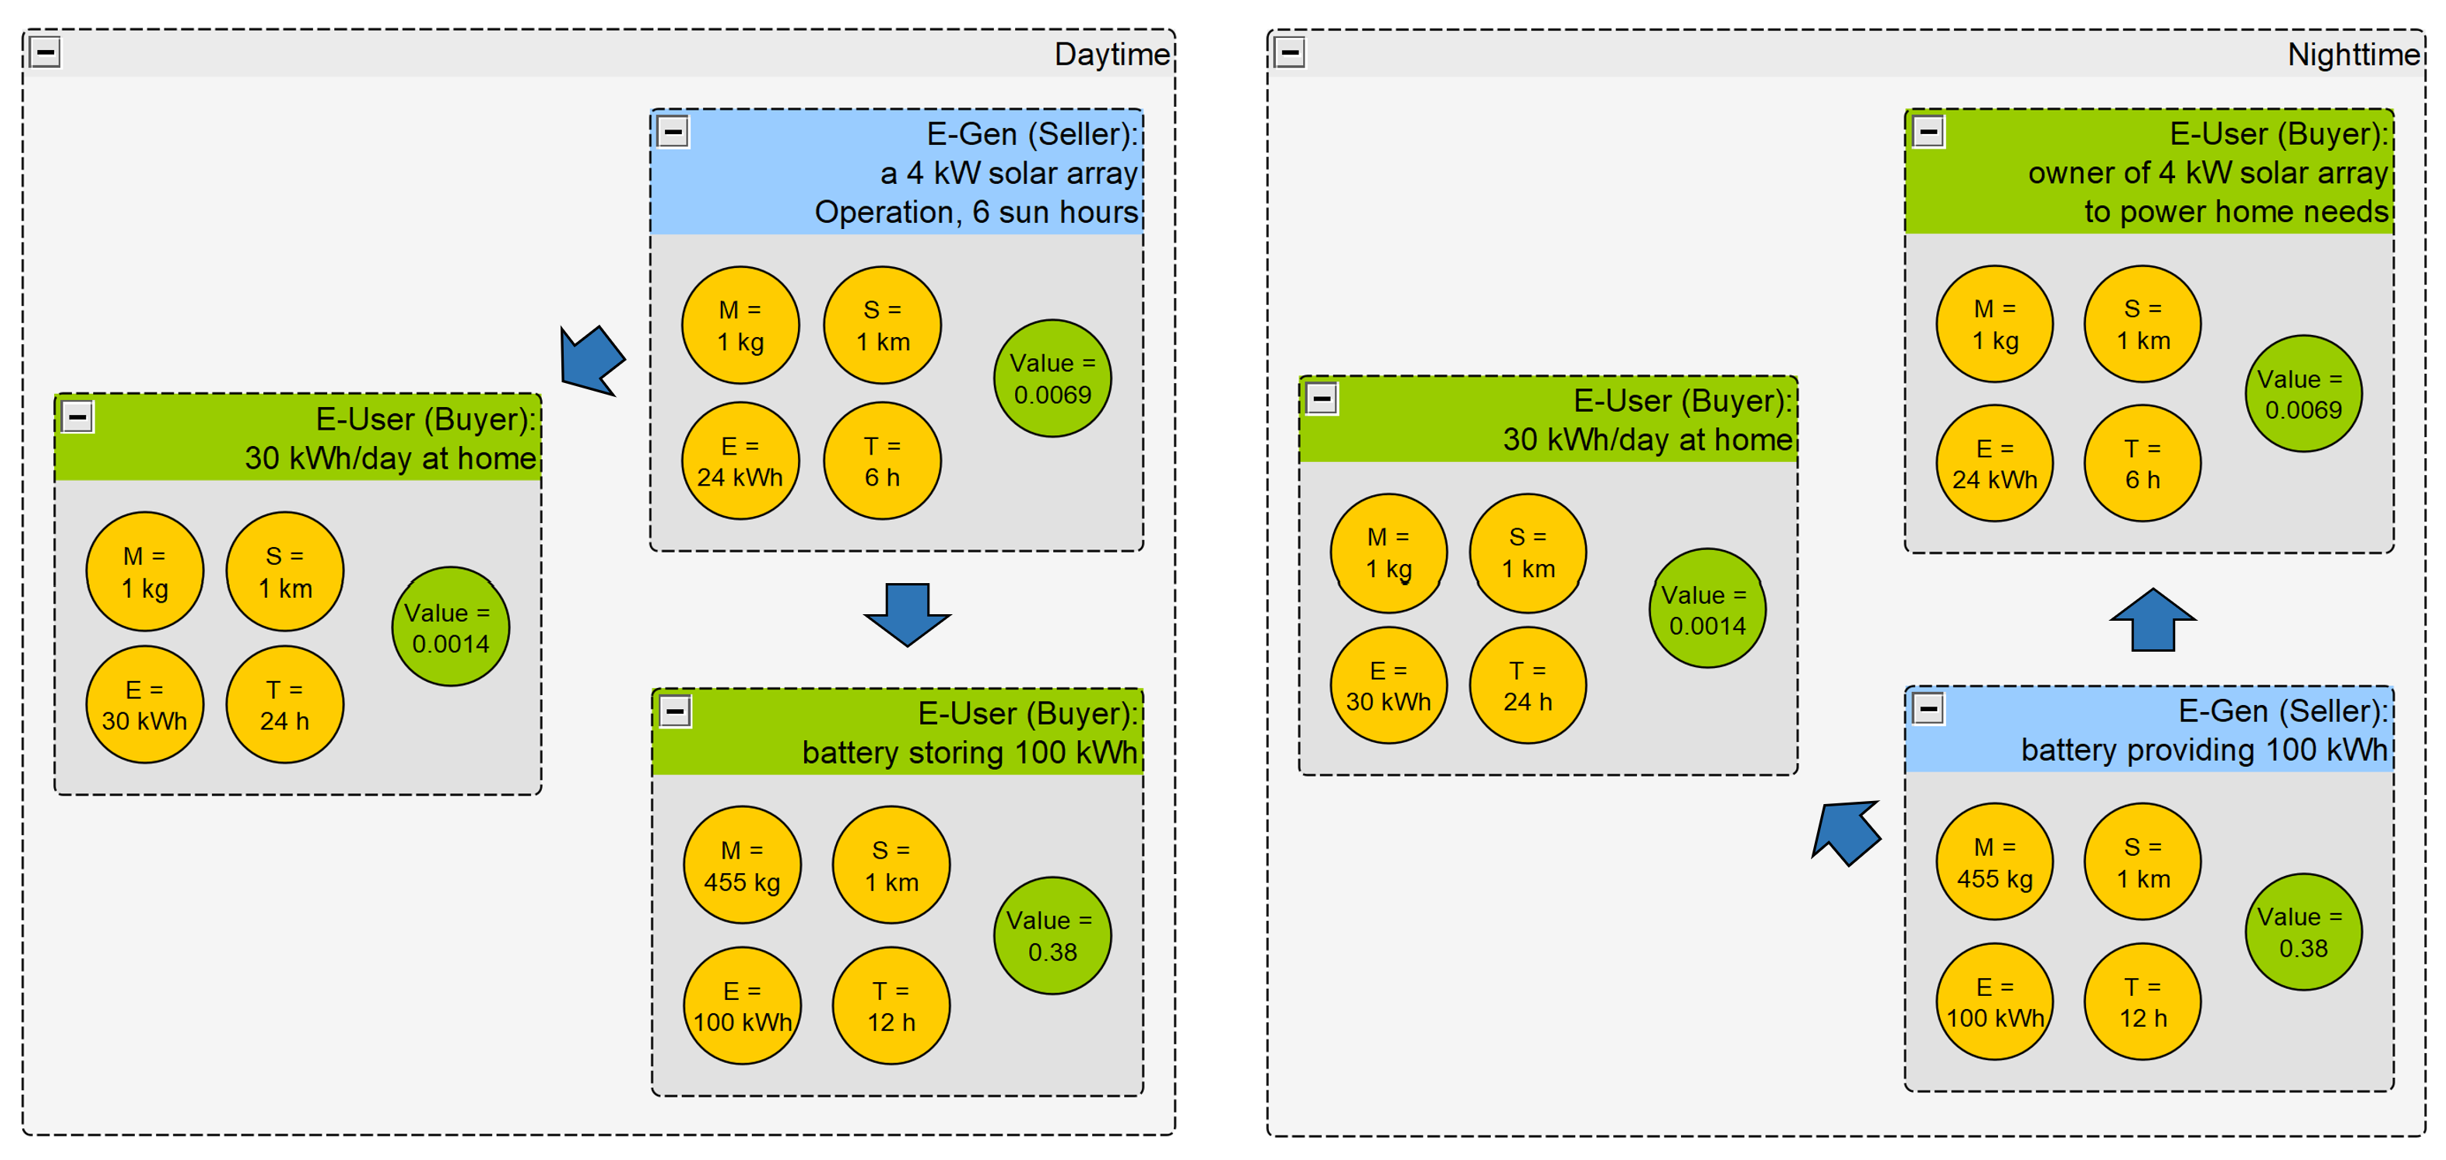

### Daytime Units

In [ ]:
# E-Gen (Seller) - a 4 kW solar array operating over 6 sun hours
solar_home = Element('Rooftop_Solar', EType.PRODUCT)
solar_home.setValue(E=24, M=1, I=1, T=6, S=1)
solar_home_value = solar_home.getValue()
solar_home.setTType = TType.SELL

# E-User (Buyer) - One Portable Whole-Home Battery Storing 100 kWh (EV-size)
battery = Element('Portable_Battery', EType.PRODUCT)
battery.setValue(E=100, M=455, I=1, T=12, S=1)
battery_value = battery.getValue()
battery.setTType = TType.BUY

# E-User (Buyer) - One Home Requiring 30 kWh over a 24 hour day
home = Element('My_Home', EType.PRODUCT)
home.setValue(E=30, M=1, I=1, T=24, S=1)
home_value = home.getValue()
home.setTType = TType.BUY

### Nighttime Units

In [ ]:
# E-Gen (Seller) - One Portable Whole-Home Battery Providing 100 kWh (EV-size)
battery = Element('Portable_Battery', EType.PRODUCT)
battery.setValue(E=100, M=455, I=1, T=12, S=1)
battery_value = battery.getValue()
battery.setTType = TType.SELL

# E-User (Buyer) - Owner of the 4 kW solar array, now needing to power their home
solar_home = Element('Rooftop_Solar', EType.PRODUCT)
solar_home.setValue(E=24, M=1, I=1, T=6, S=1)
solar_home_value = solar_home.getValue()
solar_home.setTType = TType.BUY

# E-User (Buyer) - One Home Requiring 30 kWh over a 24 hour day
home = Element('My_Home', EType.PRODUCT)
home.setValue(E=30, M=1, I=1, T=24, S=1)
home_value = home.getValue()
home.setTType = TType.BUY

## Defining A Transaction
This is a node representing a single transaction event occurring on the spatiotemporal network.

In [ ]:
class Transaction:

  def __init__(self):
    self.buyer_name = ''
    self.seller_name = ''
    self.unit = ''
    self.qty = ''
    self.value = ''
    self.time_start = 0
    self.time_end = 0
    self.location_buy = ''
    self.location_sell = ''

  def add_buyer(self, buyer_name):
    self.buyer = buyer_name

  def add_seller(self, seller_name):
    self.seller = seller_name

### Additional Transaction-Related Items to Define

Network structure - nodes (buyers/sellers) with items to transact (one or more Elements or ElementArrays)

Transactions are expressed according to the Transaction class above. These take place at an Event defined by the coincidence of at least two people (intersecting paths on the ST network).

Flows between any two points expressed according to the quantity of EMiTS contained in all branches between those two nodes

In [ ]:
# Nodes with a net amount of EMiTS
# Networks (such as microgrids) with some number of Nodes
# Flows (of EMiTS) occurring throughout Networks

## Code for Network Generation

In [ ]:
# Uses 3d force graph

!git clone https://github.com/vasturiano/3d-force-graph.git